In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.Tensor([[1, 2, 3], [4, 5, 6]])
x = x.view([1, 6])
x.shape

torch.Size([1, 6])

In [3]:
import torchvision
from torchvision import datasets, transforms

In [4]:
train = datasets.MNIST('', train=True, download=True, transform=transforms.Compose([transforms.ToTensor()]))

test = datasets.MNIST('', train=False, download=True, transform=transforms.Compose([transforms.ToTensor()]))

In [5]:
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)

testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)

In [6]:
total = 0
counter = {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}

for data in trainset:
    imgs, nums = data
    for num in nums:
        counter[int(num)] += 1
        total += 1

In [60]:
for key in counter:
    print(f"{key}: {counter[key]*100/total:.4}%")

0: 9.872%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.737%
5: 9.035%
6: 9.863%
7: 10.44%
8: 9.752%
9: 9.915%


torch.Size([1, 28, 28])
number: 4


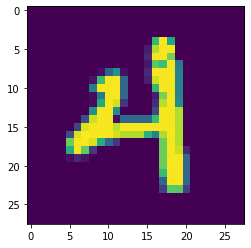

In [7]:
for data in trainset:
    print(data[0][0].shape)
    plt.imshow(data[0][0].view([28, 28]))
    print(f'number: {data[1][0]}')
    break

In [8]:
import torch.nn as nn
import torch.nn.functional as F

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # fully connected layer
        # (input, output)  28 * 28 = 784
        self.fc1 = nn.Linear(28*28, 64) 
        self.fc2 = nn.Linear(64, 64) 
        self.fc3 = nn.Linear(64, 64) 
        self.fc4 = nn.Linear(64, 10) # output has 10 neurons for 10 numbers
        
    def forward(self, x):
        # F.relu is activation function (runs on output, not input)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1)
    
    

In [10]:
net = Net()
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [11]:
X = torch.rand([28, 28])

output = net(X.view([1, 28*28]))
# or net(X.view(-1, 28*28)) where -1 means any size

In [12]:
output

tensor([[-2.3113, -2.2488, -2.2982, -2.4520, -2.3025, -2.2471, -2.2876, -2.3425,
         -2.2732, -2.2780]], grad_fn=<LogSoftmaxBackward>)

In [ ]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) # lr = learning rate

EPOCHS = 3

for epoch in range(EPOCHS):
    for data in trainset:
        # data is a batch of featuresets and labels
        X, y = data
        net.zero_grad()
        output = net(X.view([-1, 28*28]))
        loss = F.nll_loss(output, y)
        loss.backward()
        optimizer.step()
    print(loss)

tensor(0.0317, grad_fn=<NllLossBackward>)


In [116]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        X, y = data
        output = net(X.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print(f'Accuracy: {round(correct * 100 / total)}%')

Accuracy: 98%


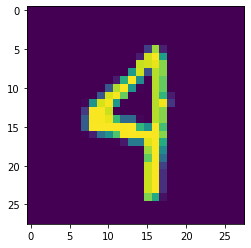

In [125]:
plt.imshow(X[5].view(28, 28))


In [127]:
print(torch.argmax(net(X[5].view(-1, 28*28))[0]))

tensor(4)
